# Plot ELG chains
This jupyter notebook contains some code to make plots of the bestfits and contours for the abacus cubic ELG fits to both the mock mean and individual realisations.

In [1]:
# Import some necessary modules
import os
import sys
import pickle
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chainconsumer import ChainConsumer     

sys.path.append("../../Barry/")     # Change this so that it points to where you have Barry installed

from barry.samplers import DynestySampler
from barry.samplers import NautilusSampler
from barry.config import setup
from barry.models import PowerBeutler2017, CorrBeutler2017
from barry.datasets.dataset_power_spectrum import PowerSpectrum_DESI_KP4
from barry.datasets.dataset_correlation_function import CorrelationFunction_DESI_KP4
from barry.fitter import Fitter
from barry.models.model import Correction # class for applying corrections to the likelihood function 
from barry.utils import weighted_avg_and_cov # function for getting avg and covariance 

#print(sys.path)
# Read in the fitter class to get all the info on the fit
#pfn = "../plots/desi_kp4_abacus_cubic_ELG/output/desi_kp4_abacus_cubic_ELG.fitter.pkl"

elgs_z008_z011 = True 
elgs_z011_z016 = False
lrgs_z004_z006 = False 
lrgs_z006_z008 = False 
lrgs_z008_z011 = False 
qsos_z008_z021 = False 
phase_shift_free = True #False 

path_p1 = '/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/'

pfn = path_p1 + "desi_kp4_abacus_cubic_ELG-secondgenmocks/output/desi_kp4_abacus_cubic_ELG-secondgenmocks.fitter.pkl"
pfn2 = path_p1 + "desi_kp4_abacus_cubic_ELG-secondgenmocks/output/"

if phase_shift_free: 
    pfn = path_p1 + "desi_kp4_abacus_cubic_ELG-secondgenmocks-phaseshift/output/desi_kp4_abacus_cubic_ELG-secondgenmocks-phaseshift.fitter.pkl"
    pfn2 = path_p1 + "desi_kp4_abacus_cubic_ELG-secondgenmocks-phaseshift/output/"

if elgs_z011_z016: 
    # ELGs z = 1.1 - 1.6 
    pfn = path_p1 + "desi_kp4_abacus_cubic_ELG-secondgenmocks-z11-16/output/desi_kp4_abacus_cubic_ELG-secondgenmocks-z11-16.fitter.pkl"
    pfn2 = path_p1 + "desi_kp4_abacus_cubic_ELG-secondgenmocks-z11-16/output/"
    
    if phase_shift_free:
        pfn = path_p1 + "desi_kp4_abacus_cubic_ELG-secondgenmocks-phaseshift-z11-16/output/desi_kp4_abacus_cubic_ELG-secondgenmocks-phaseshift-z11-16.fitter.pkl"
        pfn2 = path_p1 + "desi_kp4_abacus_cubic_ELG-secondgenmocks-phaseshift-z11-16/output/"
        
elif lrgs_z004_z006:
    # LRGs z = 0.4 - 0.6 
    pfn = path_p1 + "desi_kp4_abacus_cubic_LRG-secondgenmocks-z04-06/output/desi_kp4_abacus_cubic_LRG-secondgenmocks-z04-06.fitter.pkl"
    pfn2 = path_p1 + "desi_kp4_abacus_cubic_LRG-secondgenmocks-z04-06/output/"
    
    if phase_shift_free:
        pfn = path_p1 + "desi_kp4_abacus_cubic_LRG-secondgenmocks-phaseshift-z04-06/output/desi_kp4_abacus_cubic_ELG-secondgenmocks-phaseshift-z04-06.fitter.pkl"
        pfn2 = path_p1 + "desi_kp4_abacus_cubic_LRG-secondgenmocks-phaseshift-z04-06/output/"
        
elif lrgs_z006_z008:
    # LRGs z = 0.6 - 0.8 
    pfn = path_p1 + "desi_kp4_abacus_cubic_LRG-secondgenmocks-z06-08/output/desi_kp4_abacus_cubic_LRG-secondgenmocks-z06-08.fitter.pkl"
    pfn2 = path_p1 + "desi_kp4_abacus_cubic_LRG-secondgenmocks-z06-08/output/"
    
    if phase_shift_free:
        pfn = path_p1 + "desi_kp4_abacus_cubic_LRG-secondgenmocks-phaseshift-z06-08/output/desi_kp4_abacus_cubic_LRG-secondgenmocks-phaseshift-z06-08.fitter.pkl"
        pfn2 = path_p1 + "desi_kp4_abacus_cubic_LRG-secondgenmocks-phaseshift-z06-08/output/"
        
elif lrgs_z008_z011:
    # LRGs z = 0.8 - 1.1 
    pfn = path_p1 + "desi_kp4_abacus_cubic_LRG-secondgenmocks-z08-11/output/desi_kp4_abacus_cubic_LRG-secondgenmocks-z08-11.fitter.pkl"
        pfn2 = path_p1 + "desi_kp4_abacus_cubic_LRG-secondgenmocks-z08-11/output/"
    
    if phase_shift_free:
        pfn = path_p1 + "desi_kp4_abacus_cubic_LRG-secondgenmocks-phaseshift-z08-11/output/desi_kp4_abacus_cubic_LRG-secondgenmocks-phaseshift-z08-11.fitter.pkl"
        pfn2 = path_p1 + "desi_kp4_abacus_cubic_LRG-secondgenmocks-phaseshift-z08-11/output/"
        
elif qsos_z008_z021:
    # QSOs z = 0.8 - 2.1 
    pfn = path_p1 + "desi_kp4_abacus_cubic_QSO-secondgenmocks-z08-21/output/desi_kp4_abacus_cubic_QSO-secondgenmocks-z08-21.fitter.pkl"
    pfn2 = path_p1 + "desi_kp4_abacus_cubic_QSO-secondgenmocks-z08-21/output/"
    
    if phase_shift_free:
        pfn = path_p1 + "desi_kp4_abacus_cubic_QSO-secondgenmocks-phaseshift-z08-21/output/desi_kp4_abacus_cubic_QSO-secondgenmocks-phaseshift-z08-21.fitter.pkl"
        pfn2 = path_p1 + "desi_kp4_abacus_cubic_QSO-secondgenmocks-phaseshift-z08-21/output/"

with open(pfn, 'rb') as pickle_file:
    fitter = pickle.load(pickle_file)
 


This code segment reads in the chains, plots the bestfit model vs. data and prepares stuff for contour plots and summary files

DESI SecondGen sm10 ELG_LOP_ffa_GCcomb_0.8_1.1 default_FKP Prerecon mock mean 0 mean
Maximum likelihood nuisance parameters at maximum a posteriori point are [ 5.75814454e-01 -1.58933073e-04  6.91669233e-04 -1.82857580e-04
  8.61145042e-04]
Chi squared/dof is 33.654336655459524/40 at these values


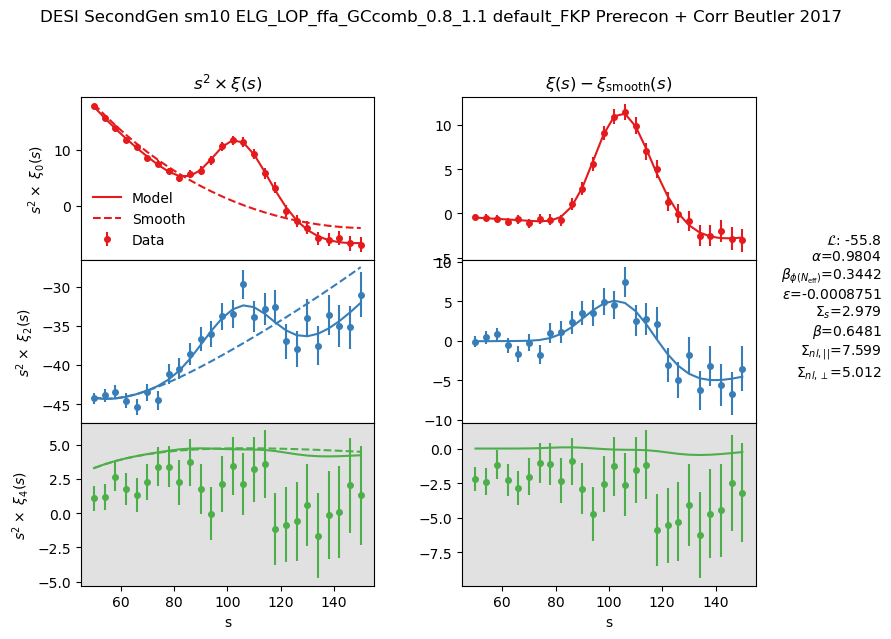

DESI SecondGen sm10 ELG_LOP_ffa_GCcomb_0.8_1.1 default_FKP Prerecon realisation 0 0 0
Maximum likelihood nuisance parameters at maximum a posteriori point are [ 4.67265437e-01 -2.95036903e-04  1.55856045e-03  8.13428296e-04
  2.44499850e-04]
Chi squared/dof is 517.9263689350025/40 at these values
DESI SecondGen sm10 ELG_LOP_ffa_GCcomb_0.8_1.1 default_FKP Prerecon realisation 1 0 1
Maximum likelihood nuisance parameters at maximum a posteriori point are [ 3.92878594e-01  3.07728433e-04 -2.83854108e-03  5.90589182e-04
 -6.51931529e-03]
Chi squared/dof is 620.943938122969/40 at these values
DESI SecondGen sm10 ELG_LOP_ffa_GCcomb_0.8_1.1 default_FKP Prerecon realisation 2 0 2
Maximum likelihood nuisance parameters at maximum a posteriori point are [ 6.92423936e-01 -2.41075796e-05 -5.31316675e-04 -9.29416043e-04
  5.47808068e-03]
Chi squared/dof is 605.2422604738604/40 at these values
DESI SecondGen sm10 ELG_LOP_ffa_GCcomb_0.8_1.1 default_FKP Prerecon realisation 3 0 3
Maximum likelihood nu

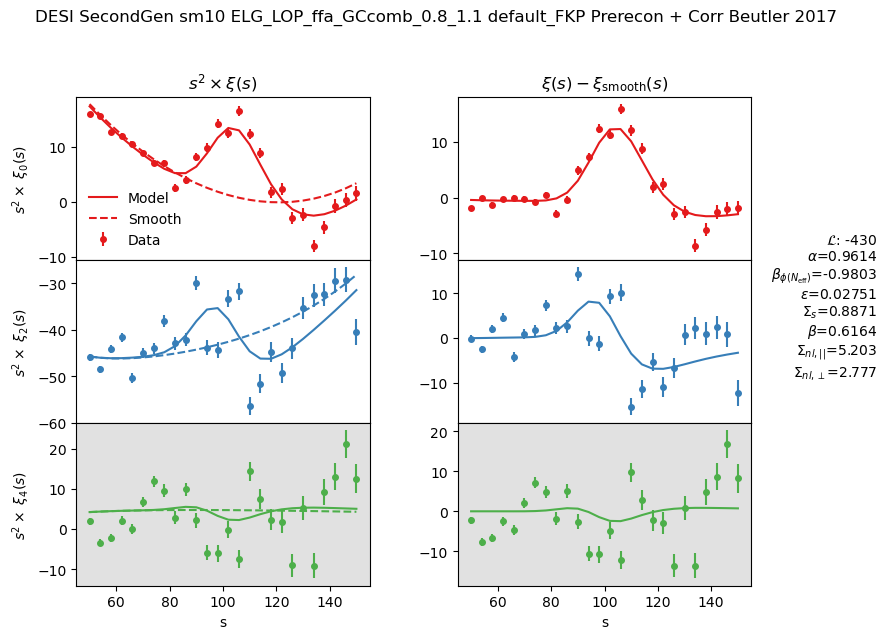

DESI SecondGen sm10 ELG_LOP_ffa_GCcomb_0.8_1.1 default_FKP Prerecon realisation 11 0 11
Maximum likelihood nuisance parameters at maximum a posteriori point are [ 8.99047494e-01 -1.57243871e-04  1.29058004e-03 -1.68184826e-03
  9.99264224e-03]
Chi squared/dof is 666.0233400687873/40 at these values
DESI SecondGen sm10 ELG_LOP_ffa_GCcomb_0.8_1.1 default_FKP Prerecon realisation 12 0 12
Maximum likelihood nuisance parameters at maximum a posteriori point are [ 5.51410085e-01 -4.39187614e-05 -1.35353767e-03  6.67623277e-04
 -5.11030060e-03]
Chi squared/dof is 604.6014321319831/40 at these values
DESI SecondGen sm10 ELG_LOP_ffa_GCcomb_0.8_1.1 default_FKP Prerecon realisation 13 0 13
Maximum likelihood nuisance parameters at maximum a posteriori point are [ 5.90279570e-01 -9.40551538e-04  5.59056652e-03 -6.91815837e-05
  4.13623120e-03]
Chi squared/dof is 717.6316652715493/40 at these values
DESI SecondGen sm10 ELG_LOP_ffa_GCcomb_0.8_1.1 default_FKP Prerecon realisation 14 0 14
Maximum like

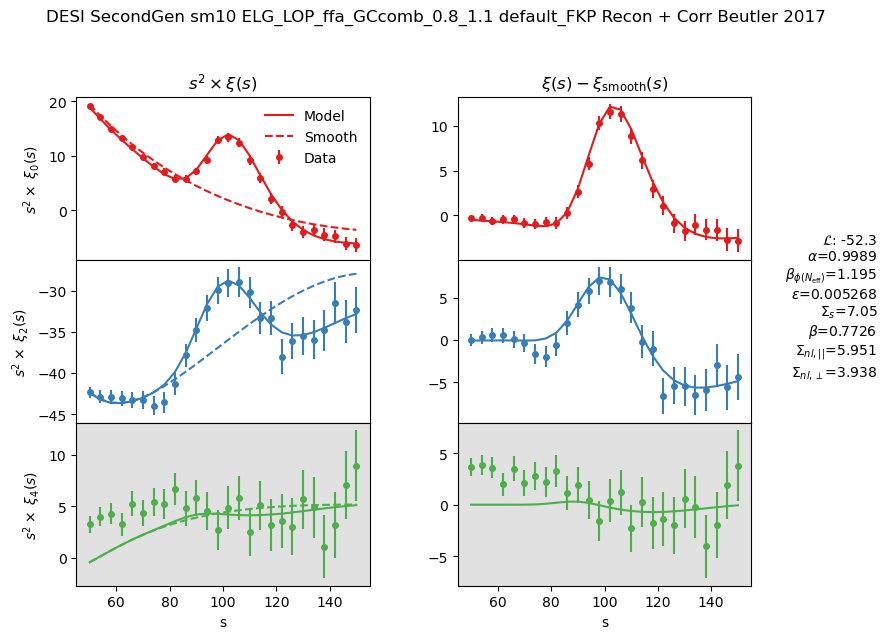

DESI SecondGen sm10 ELG_LOP_ffa_GCcomb_0.8_1.1 default_FKP Recon realisation 0 1 0
Maximum likelihood nuisance parameters at maximum a posteriori point are [ 5.12037184e-01 -1.79967691e-04  9.03770062e-04  1.11299802e-03
 -4.02762093e-05]
Chi squared/dof is 439.06715055295865/40 at these values
DESI SecondGen sm10 ELG_LOP_ffa_GCcomb_0.8_1.1 default_FKP Recon realisation 1 1 1
Maximum likelihood nuisance parameters at maximum a posteriori point are [ 4.35827469e-01  2.60993103e-04 -2.13718718e-03 -1.00501430e-04
 -2.67422905e-04]
Chi squared/dof is 855.5500273564377/40 at these values
DESI SecondGen sm10 ELG_LOP_ffa_GCcomb_0.8_1.1 default_FKP Recon realisation 2 1 2
Maximum likelihood nuisance parameters at maximum a posteriori point are [ 7.26662313e-01  1.18839312e-05 -2.96443778e-04 -2.29137220e-04
  9.63261442e-04]
Chi squared/dof is 653.3021418794624/40 at these values
DESI SecondGen sm10 ELG_LOP_ffa_GCcomb_0.8_1.1 default_FKP Recon realisation 3 1 3
Maximum likelihood nuisance par

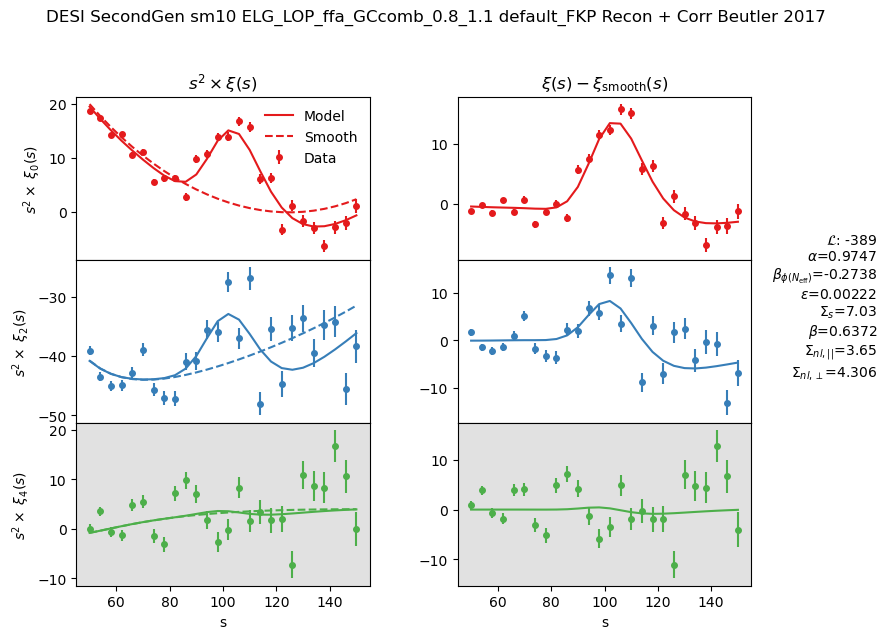

DESI SecondGen sm10 ELG_LOP_ffa_GCcomb_0.8_1.1 default_FKP Recon realisation 11 1 11
Maximum likelihood nuisance parameters at maximum a posteriori point are [ 8.12819573e-01 -2.19095255e-04  1.75903507e-03 -8.61563814e-04
  6.54974798e-03]
Chi squared/dof is 474.99066186854657/40 at these values
DESI SecondGen sm10 ELG_LOP_ffa_GCcomb_0.8_1.1 default_FKP Recon realisation 12 1 12
Maximum likelihood nuisance parameters at maximum a posteriori point are [ 6.73298377e-01  2.74562316e-04 -3.39038602e-03  2.08664655e-03
 -1.24671214e-02]
Chi squared/dof is 642.683590367832/40 at these values
DESI SecondGen sm10 ELG_LOP_ffa_GCcomb_0.8_1.1 default_FKP Recon realisation 13 1 13
Maximum likelihood nuisance parameters at maximum a posteriori point are [ 5.76027636e-01 -4.08670946e-04  3.01710875e-03  8.20982647e-04
  6.05306383e-04]
Chi squared/dof is 828.9535984754488/40 at these values
DESI SecondGen sm10 ELG_LOP_ffa_GCcomb_0.8_1.1 default_FKP Recon realisation 14 1 14
Maximum likelihood nuisa

In [2]:
logging.info("Creating plots")

fitname = []
# datanames = ["CV_Xi_Prerecon", "CV_Xi_Recon", "CV_Pk_Prerecon", "CV_Pk_Recon"]#, "Pk_Recon"]
datanames = ["Xi_Prerecon", "Xi_Recon", "Pk_Prerecon", "Pk_Recon"]#, "Pk_Recon"]

c = [ChainConsumer(), ChainConsumer(), ChainConsumer(), ChainConsumer()]

# Loop over all the chains
stats = {k: [] for k in datanames}
output = {k: [] for k in datanames}
for posterior, weight, chain, evidence, model, data, extra in fitter.load():

    #print(chain)
    #print(extra)
    #print(extra['name'])
    #print(model.get_labels(), chain.shape)
    # Get the realisation number and redshift bin
    #print(extra['name']) 
    
#     if "Pk" not in extra["name"]:
#        continue     
#     #print(extra)
        
    recon_bin = 0 if "Prerecon" in extra["name"] else 1
    data_bin = 0# if "Xi" in extra["name"] else 1
    realisation = str(extra["name"].split()[-1]) if "realisation" in extra["name"] else "mean"
    chain_bin = int(2.0 * data_bin + recon_bin)
    print(extra["name"], chain_bin, realisation)
    #print(extra['name'])
    #print(model.get_labels(), chain.shape)
    # Store the chain in a dictionary with parameter names
    df = pd.DataFrame(chain, columns=model.get_labels())
    
    #print(df)
    #print(weight)
    #print(extra)
    
    cols = df.columns.to_numpy()
    #df = df.rename(columns={r'$\beta_{\\phi(N_{\mathrm{eff}})}$' : r'$\beta_{\phi(N_{\mathrm{eff}})}$'})

    # Compute alpha_par and alpha_perp for each point in the chain
    alpha_par, alpha_perp = model.get_alphas(df["$\\alpha$"].to_numpy(), df["$\\epsilon$"].to_numpy())
    df["$\\alpha_\\parallel$"] = alpha_par
    df["$\\alpha_\\perp$"] = alpha_perp

    # Get the MAP (maximum a posteriori) point and set the model up at this point
    #model.broadband_type = "poly" 
    #model.n_poly = (0,2)
    #model.delta = None 
    
    model.set_data(data)
    
    r_s = model.camb.get_data()["r_s"]
    max_post = posterior.argmax()
    params = df.loc[max_post]
    params_dict = model.get_param_dict(chain[max_post])
    #print(params_dict)
    for name, val in params_dict.items():
        model.set_default(name, val)

    # Get some useful properties of the fit, and plot the MAP model against the data if it's the mock mean or realisation 10 (chosen randomly!)
    display = True if realisation == "mean" or realisation == "10" else False
    #print(params_dict)
    new_chi_squared, dof, bband, mods, smooths = model.plot(params_dict, display=display)

    # Add the chain or MAP to the Chainconsumer plots
    extra.pop("realisation", None)
    if realisation == "mean" or realisation == 'mean CV':
        #print(realisation)
        c[chain_bin].add_chain(df, weights=weight, **extra, plot_contour=True, plot_point=False, show_as_1d_prior=False)
        #print(df)
        df_for_file = df
        df['weights'] = weight
        df_for_file.to_csv(pfn2 + extra['name'] +'.csv')
    else:
        c[chain_bin].add_marker(params, **extra, marker_size=80)

    # Compute some summary statistics and add them to a dictionary
    
    params = [
                "$\\alpha_\\parallel$",
                "$\\alpha_\\perp$",
                "$\\Sigma_{nl,||}$",
                "$\\Sigma_{nl,\\perp}$",
                "$\\Sigma_s$"
            ]
    
    if phase_shift_free: 
        params.append("$\\beta_{\\phi(N_{\\mathrm{eff}})}$")
    
    mean, cov = weighted_avg_and_cov(
        df[
            params
        ],
        weight,
        axis=0,
    )
    
    # print(params)
    #print(weighted_avg_and_cov(df["$\\beta$"], weight, axis=0)[0])
#     print(weighted_avg_and_cov(df["$\\alpha$"], weight, axis=0)[0])
#     print(weighted_avg_and_cov(df["$\\epsilon$"], weight, axis=0)[0])

#     if 'Prerecon' not in extra['name']:
#         #sigma_s_mean += weighted_avg_and_cov(df["$\\Sigma_s$"], weight, axis=0)[0]
#         count += 1
        
#         beta_mean += weighted_avg_and_cov(df["$\\beta$"], weight, axis=0)[0]
    
#     print(mean)
    #continue
     
    if phase_shift_free: ################################### 
        
        corr_alpha_para_perp = cov[1, 0] / np.sqrt(cov[0, 0] * cov[1, 1])
        corr_alpha_para_phase = cov[5, 0] / np.sqrt(cov[5, 5] * cov[0, 0])
        corr_alpha_perp_phase = cov[5, 1] / np.sqrt(cov[5, 5] * cov[1, 1])
        
       
        stats[datanames[chain_bin]].append( # mean alpha_\\, mean alpha_para, stdev alpha\\, stdev alphaperp, corr_alphas, 
            # mean beta, stdev beta, corrs beta and alphas, chisquare, 
            # mean sigma_\\, mean sigma_perp, mean sigma_s 
            [mean[0], mean[1], np.sqrt(cov[0, 0]), np.sqrt(cov[1, 1]), 
            corr_alpha_para_perp, mean[5], np.sqrt(cov[5,5]), corr_alpha_para_phase, corr_alpha_perp_phase, new_chi_squared, mean[2], mean[3], mean[4]]
        )

        output[datanames[chain_bin]].append(
            # realisation name, all means of params, stdevs on alphas , corrs alphas, stdev beta, corrs beta/alphas .... other stats 
            f"{realisation:s}, {mean[0]:6.4f}, {mean[1]:6.4f}, {mean[2]:6.4f}, {mean[3]:6.4f}, {mean[4]:6.4f}, {mean[5]:6.4f}, {np.sqrt(cov[0, 0]):6.4f}, {np.sqrt(cov[1, 1]):6.4f}, {corr_alpha_para_perp:7.3f}, {np.sqrt(cov[5, 5]):6.4f}, {corr_alpha_para_phase:7.3f}, {corr_alpha_perp_phase:7.3f}, {r_s:7.3f}, {new_chi_squared:7.3f}, {dof:4d}"
        )
        
    else: ###################################
        
        corr = cov[1, 0] / np.sqrt(cov[0, 0] * cov[1, 1])
        
        stats[datanames[chain_bin]].append( # mean alpha_\\, mean alpha_para, stdev alpha\\, stdev alphaperp, corr_alphas, chisquare, 
            # mean sigma_\\, mean sigma_perp, mean sigma_s 
            [mean[0], mean[1], np.sqrt(cov[0, 0]), np.sqrt(cov[1, 1]), corr, new_chi_squared, mean[2], mean[3], mean[4]]
        )

        output[datanames[chain_bin]].append(
            # realisation name, all means of params, stdevs on alphas .... other stats 
            f"{realisation:s}, {mean[0]:6.4f}, {mean[1]:6.4f}, {mean[2]:6.4f}, {mean[3]:6.4f}, {mean[4]:6.4f}, {np.sqrt(cov[0, 0]):6.4f}, {np.sqrt(cov[1, 1]):6.4f}, {corr:7.3f}, {r_s:7.3f}, {new_chi_squared:7.3f}, {dof:4d}"
        )
    #print('test')
print(stats)        
# print(beta_mean/count)

Plot the contour plots and output the summary statistics

Xi_Prerecon


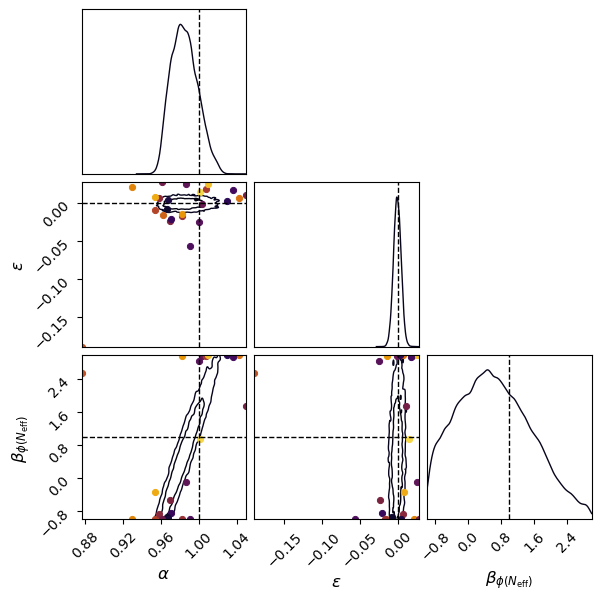

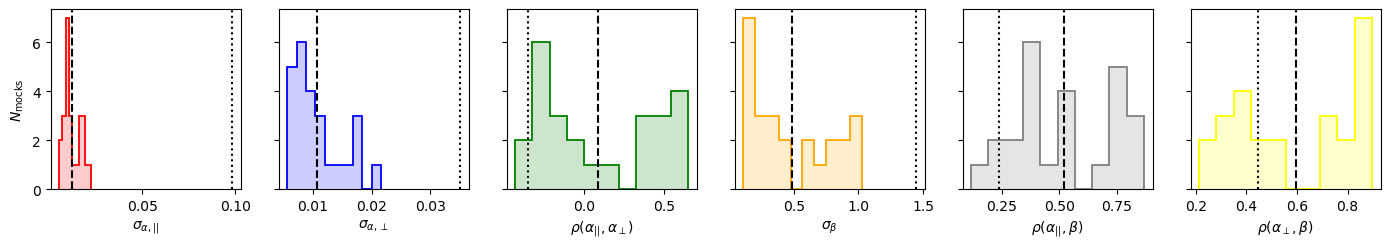

Xi_Recon


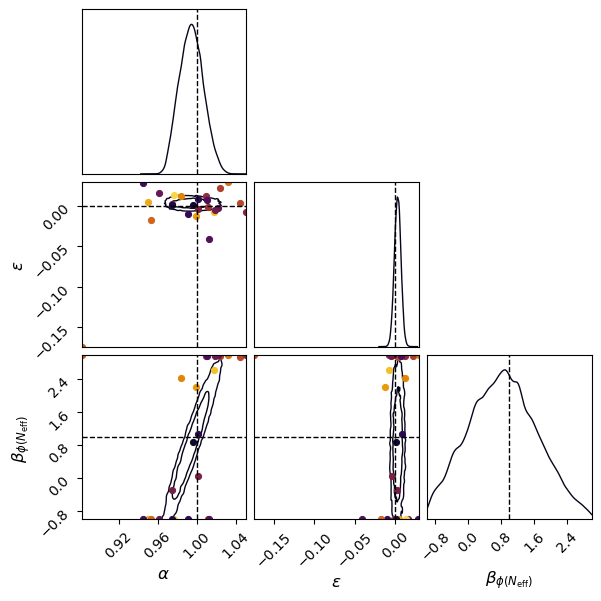

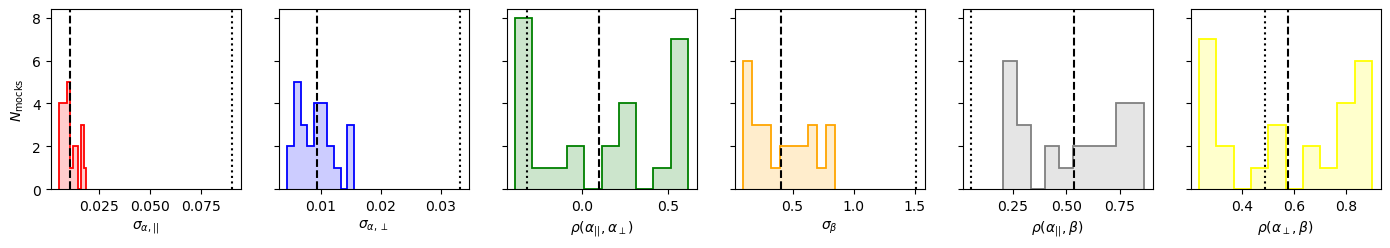

In [4]:
def plot_errors(stats, phase_shift_free=False, suffix=''):
    
    nstats = len(stats)
    means = np.mean(stats, axis=0)
    covs = np.cov(stats, rowvar=False)
    corr = covs[0, 1] / np.sqrt(covs[0, 0] * covs[1, 1])

    labels = [r"$\sigma_{\alpha,||}$", r"$\sigma_{\alpha,\perp}$", r"$\rho(\alpha_{||},\alpha_{\perp})$"] 
    colors = ["r", "b", "g"]
    
    if phase_shift_free: 
        labels.append(r"$\sigma_{\beta}$")
        labels.append(r"$\rho(\alpha_{||},\beta)$")
        labels.append(r"$\rho(\alpha_{\perp},\beta)$")
        colors.append("orange")
        colors.append("grey")
        colors.append("yellow")

    fig, axes = plt.subplots(figsize=(7, 2), nrows=1, ncols=len(labels), sharey=True, squeeze=False)
    if phase_shift_free:
        plt.subplots_adjust(left=0.1, top=0.95, bottom=0.05, right=2.0, hspace=0.3)
    else:
        plt.subplots_adjust(left=0.1, top=0.95, bottom=0.05, right=0.95, hspace=0.3)
    
    range_vals = [2,3,4]
    range_means = [2,3,4]
    stds_arr = [np.sqrt(covs[0, 0]), np.sqrt(covs[1, 1]), corr]
    
    if phase_shift_free: 
        range_vals = [2,3,4,6,7,8] 
        stds_arr = [
                   np.sqrt(covs[0, 0]), 
                   np.sqrt(covs[1, 1]), 
                   corr,
                   np.sqrt(covs[5, 5]),
                   covs[0, 5] / np.sqrt(covs[0, 0] * covs[5, 5]),
                   covs[5, 1] / np.sqrt(covs[5, 5] * covs[1, 1])
                   ]
        range_means = [2,3,4,6,7,8] 
    
    for ax, vals, avgs, stds, l, c in zip(axes.T, np.array(stats).T[range_vals,:], means[range_means], stds_arr, labels, colors):

        ax[0].hist(vals, 10, color=c, histtype="stepfilled", alpha=0.2, density=False, zorder=0)
        ax[0].hist(vals, 10, color=c, histtype="step", alpha=1.0, lw=1.3, density=False, zorder=1)
        ax[0].axvline(avgs, color="k", ls="--", zorder=2)
        ax[0].axvline(stds, color="k", ls=":", zorder=2)
        ax[0].set_xlabel(l)
        
    axes[0, 0].set_ylabel(r"$N_{\mathrm{mocks}}$")

    #plt.savefig("plots/desi_kp4_abacus_cubic_ELG"+suffix+"/output/histplot_v2.png", bbox_inches='tight')
    plt.show()

    return nstats, means, covs, corr

truth = {"$\\alpha$": 1.0, "$\\epsilon$": 0, "$\\alpha_\\perp$": 1.0, "$\\alpha_\\parallel$": 1.0}
#truth={"$\\epsilon$": 0,}
# truth = {"$\\alpha_\\perp$": 1.0, "$\\alpha_\\parallel$": 1.0}

if phase_shift_free:
    truth["$\\beta_{\\phi(N_{\\mathrm{eff}})}$"] = 1.0

parameters = [names for names in truth]
parameters.append("$\\Sigma_s$")
parameters.append('$\\beta$')

suffix = ''

if phase_shift_free:
    suffix = '_phaseshiftfree'

for chain_bin in range(len(c)):
    
    # for i in stats[datanames[chain_bin]]:
    #     print(len(i))
    if 'Pk' in datanames[chain_bin]:
       continue 
        
    print(datanames[chain_bin])
    
    #print(dir(c[chain_bin]))
    #print(stats[datanames[chain_bin]])
    
    parameters_used = parameters 
    
    if phase_shift_free: 
        c[chain_bin].plotter.plot(
        truth=truth,
            parameters=(parameters_used[:2]+[parameters_used[4]]),
            #parameters =parameters[2:],
            legend=False,
            display=True,
            figsize=(6,6), 
            #filename="plots/desi_kp4_abacus_cubic_ELG" + suffix + "/output/contourplot_v2" + CVfile + ".png",

        )
    else:
        
        c[chain_bin].plotter.plot(
        truth=truth,
            parameters=(parameters_used[:2]),
            #parameters =parameters[2:],
            legend=False,
            display=True,
            figsize=(6,6), 
            #filename="plots/desi_kp4_abacus_cubic_ELG" + suffix + "/output/contourplot_v2" + CVfile + ".png",

        )
    
    # Plot histograms of the errors and r_off
    
    nstats, means, covs, corr = plot_errors(stats[datanames[chain_bin]],
                                            phase_shift_free=phase_shift_free,
                                            suffix=suffix)
    

    # Save all the numbers to a file
            
    if phase_shift_free: ###################################
        
        filepath = pfn2 + 'Barry_fit_'
     
        with open(filepath + datanames[chain_bin] + ".txt", "w") as f:

            f.write(
                "# Realisation, alpha_par, alpha_perp, Sigma_nl_par, Sigma_nl_perp, Sigma_s, beta, sigma_alpha_par, sigma_alpha_perp, corr_alpha_par_perp, sigma_beta, corr_beta_alpha_par, corr_beta_alpha_prep, rd_of_template, bf_chi2, dof\n"
                )

            for l in output[datanames[chain_bin]]:
                f.write(l + "\n")

            # And now the average of all the individual realisations
            f.write("# ---------------------------------------------------\n")
            f.write(
                "# <alpha_par>, <alpha_perp>, <Sigma_nl_par>, <Sigma_nl_perp>, <phi>, <sigma_alpha_par>, <sigma_alpha_perp>, <sigma_phi>, <corr_alpha_par_perp>, <corr_alpha_par_phi>, <corr_alpha_perp_phi>, std_alpha_par, std_alpha_perp, std_phi, corr_alpha_par_perp, corr_alpha_par_phi, corr_alpha_perp_phi, <bf_chi2>\n"
                )
            f.write(
                f"{means[0]:6.4f}, {means[1]:6.4f}, {means[10]:6.4f}, {means[11]:6.4f}, {means[5]:6.4f}, {means[2]:6.4f}, {means[3]:6.4f}, {means[6]:6.4f}, {means[4]:6.4f}, {means[7]:6.4f}, {means[8]:6.4f}, {np.sqrt(covs[0, 0]):6.4f}, {np.sqrt(covs[1, 1]):6.4f}, {np.sqrt(covs[5, 5]):6.4f}, {corr:6.4f}, {(covs[0, 5] / np.sqrt(covs[0, 0] * covs[5, 5])):6.4f},{(covs[5, 1] / np.sqrt(covs[5, 5] * covs[1, 1])):6.4f}, {means[9]:7.3f}\n"
                )
        
    else:###################################
        
        filepath = pfn2 + 'Barry_fit_'
        
        with open(filepath + datanames[chain_bin] + ".txt", "w") as f:
            
            f.write(# realisation name, all means of params, stdevs on alphas .... other stats 
                "# Realisation, alpha_par, alpha_perp, Sigma_nl_par, Sigma_nl_perp, sigma_alpha_par, sigma_alpha_perp, corr_alpha_par_perp, rd_of_template, bf_chi2, dof\n"
                )
            
            for l in output[datanames[chain_bin]]:
                f.write(l + "\n")

            # And now the average of all the individual realisations
            f.write("# ---------------------------------------------------\n")
            f.write(
                "# <alpha_par>, <alpha_perp>, <Sigma_nl_par>, <Sigma_nl_perp>, <sigma_alpha_par>, <sigma_alpha_perp>, <corr_alpha_par_perp>, std_alpha_par, std_alpha_perp, corr_alpha_par_perp, <bf_chi2>\n"
                )
            f.write(
                f"{means[0]:6.4f}, {means[1]:6.4f}, {means[6]:6.4f}, {means[7]:6.4f}, {means[2]:6.4f}, {means[3]:6.4f}, {means[4]:6.4f}, {np.sqrt(covs[0, 0]):6.4f}, {np.sqrt(covs[1, 1]):6.4f}, {corr:6.4f}, {means[5]:7.3f}\n"
                )
        